# Revise last lessons
First we nee to revise the
- Linear regression
- Polynomial regression
- Multiple regression

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


The relationship constant:  -0.758591524376155
The predicted speed:  85.59308314937454


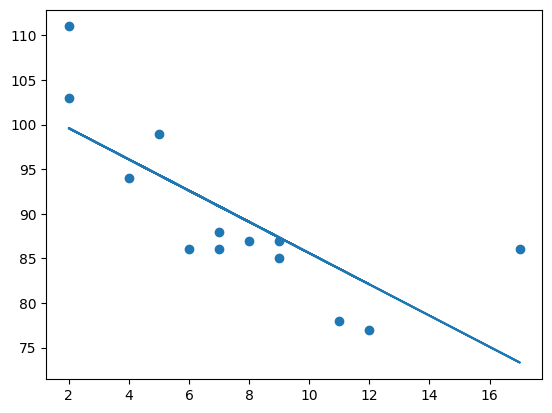

In [4]:
from scipy import stats

x = [5,7,8,7,2,17,2,9,4,11,12,9,6]
y = [99,86,87,88,111,86,103,87,94,78,77,85,86]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def func(x):
    return slope * x + intercept

mymodel = list(map(func, x)) # Áp dụng hàm func lên mọi phần tử của x, sau đó trả về đối tượng map. Nó là 1 vòng lặp, nghĩa là thay vì
                            # sử dụng vòng lặp for để lưu giá trị thành mảng, ta có thể dùng list để chuyển về mảng
print("The relationship constant: ", r)

speed = func(10)
print("The predicted speed: ", speed)

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

0.9432150416451026


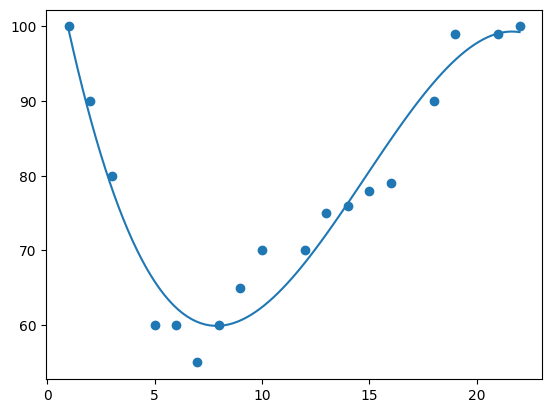

In [11]:
import numpy
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel = numpy.poly1d(numpy.polyfit(x, y, 3))

myline = numpy.linspace(1, 22, 100)
print(r2_score(y, mymodel(x)))
plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()

In [5]:
import pandas
from sklearn import linear_model

df = pandas.read_csv("data.csv")

X = df[['Weight', 'Volume']]
y = df['CO2']

regr = linear_model.LinearRegression() # Tạo 1 đối tượng (object)
regr.fit(X, y) # Thực hiện huấn luyện mô hình với data cho trước
# coef_, intercept_

#predict the CO2 emission of a car where the weight is 2300kg, and the volume is 1300cm3:
predictedCO2 = regr.predict([[2300, 1300]])

print(predictedCO2)
print(regr.coef_)
print(regr.intercept_)
print(regr.score(X, y))

[107.2087328]
[0.00755095 0.00780526]
79.69471929115939
0.3765564043619989


c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


0.7988645544629793
0.8086921460343643


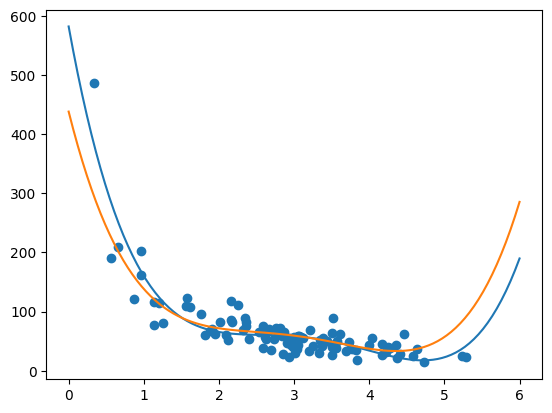

In [ ]:
from sklearn.metrics import r2_score
np.random.seed(2)

x = np.random.normal(3, 1, 100)
y = np.random.normal(150, 40, 100) / x

train_x = x[:80]
train_y = y[:80]
test_x = x[80:]
test_y = y[80:]

mymodel = np.poly1d(np.polyfit(train_x, train_y, 4))
myline = np.linspace(0, 6, 100)

testmodel = np.poly1d(np.polyfit(test_x, test_y, 4))
print(r2_score(train_y, mymodel(train_x)))
print(r2_score(test_y, mymodel(test_x)))

plt.plot(myline, mymodel(myline))
plt.plot(myline, testmodel(myline))
plt.scatter(x, y)
plt.show()

# Decision Tree

In [24]:
df = pd.read_csv("day2_data.csv")

df

,Age,Experience,Rank,Nationality,Go
0,36,10,9,UK,NO
1,42,12,4,USA,NO
2,23,4,6,N,NO
3,52,4,4,USA,NO
4,43,21,8,USA,YES
5,44,14,5,UK,NO
6,66,3,7,N,YES
7,35,14,9,UK,YES
8,52,13,7,N,YES
9,35,5,9,N,YES


## First, we need to convert all non-value data into the numerical. Use map() to take a dictionary with information on how to convert the values.

In [25]:
d = {'UK': 0, 'USA': 1, 'N':2}
df['Nationality'] = df['Nationality'].map(d)

d = {'YES': 1, 'NO': 0}
df['Go'] = df['Go'].map(d)

print(df)


    Age  Experience  Rank  Nationality  Go
0    36          10     9            0   0
1    42          12     4            1   0
2    23           4     6            2   0
3    52           4     4            1   0
4    43          21     8            1   1
5    44          14     5            0   0
6    66           3     7            2   1
7    35          14     9            0   1
8    52          13     7            2   1
9    35           5     9            2   1
10   24           3     5            1   0
11   18           3     7            0   1
12   45           9     9            0   1


## Second, seperate the feature and target

In [26]:
features = ['Age', 'Experience', 'Rank', 'Nationality']

X = df[features]
y = df['Go']

print(X)
print(y)

    Age  Experience  Rank  Nationality
0    36          10     9            0
1    42          12     4            1
2    23           4     6            2
3    52           4     4            1
4    43          21     8            1
5    44          14     5            0
6    66           3     7            2
7    35          14     9            0
8    52          13     7            2
9    35           5     9            2
10   24           3     5            1
11   18           3     7            0
12   45           9     9            0
0     0
1     0
2     0
3     0
4     1
5     0
6     1
7     1
8     1
9     1
10    0
11    1
12    1
Name: Go, dtype: int64


[1]


c:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


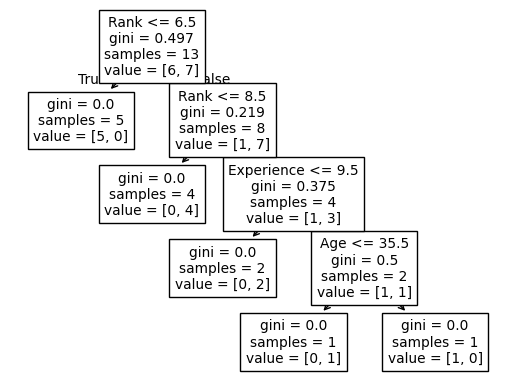

In [31]:
import pandas
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, y)

tree.plot_tree(dtree, feature_names=features)
print(dtree.predict([[40, 10, 7, 1]]))

# Confusion Matrix

It is a table that is used in classification problems to assess where errors in the model were made.

The rows represent the actual classes the outcomes should have been. While the columns represent the predictions we have made. Using this table it is easy to see which predictions are wrong.

## Creating a confusion matrix
- By logistic regression

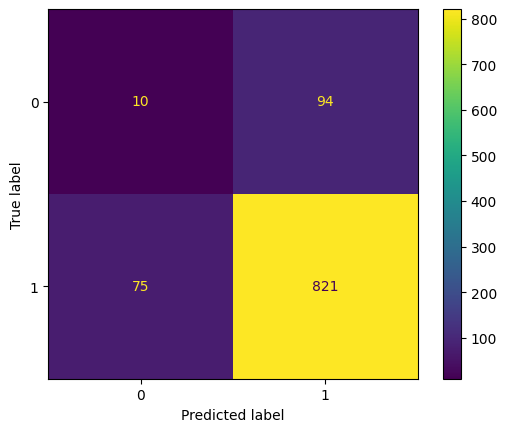

In [34]:
import numpy as np

actual = np.random.binomial(1, 0.9, size = 1000)
predicted = np.random.binomial(1, 0.9, size = 1000)

from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(actual, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

import matplotlib.pyplot as plt

cm_display.plot()
plt.show()


## Created Metrics
- The different measures include: Accuracy, Precision, Sensitivity (Recall), Specificity, and the F-score, explained below.


### Accuracy

(True Positive + True Negative) / Total Predictions

In [36]:
Accuracy = metrics.accuracy_score(actual, predicted)
print(Accuracy)

0.831


### Precision
Of the positives predicted, what percentage is truly positive?

True Positive / (True Positive + False Positive)

In [37]:
Precision = metrics.precision_score(actual, predicted)
print(Precision)

0.8972677595628415


### Sensitivity
Of all the positive cases, what percentage are predicted positive?

Sensitivity (sometimes called Recall) measures how good the model is at predicting positives.

True Positive / (True Positive + False Negative)

In [38]:
Sensitivity_recall = metrics.recall_score(actual, predicted)
print(Sensitivity_recall)

0.9162946428571429


### Specificity

Specificity is similar to sensitivity, but looks at it from the persepctive of negative results.

True Negative / (True Negative + False Positive)

In [39]:
Specificity = metrics.recall_score(actual, predicted, pos_label=0)
print(Specificity)

0.09615384615384616


### F-score

F-score is the "harmonic mean" of precision and sensitivity.

It considers both false positive and false negative cases and is good for imbalanced datasets.

2 * ((Precision * Sensitivity) / (Precision + Sensitivity))

In [40]:
F1_score = metrics.f1_score(actual, predicted)
print(F1_score)

0.9066813914964108


In [41]:
#metrics
print({"Accuracy":Accuracy,"Precision":Precision,"Sensitivity_recall":Sensitivity_recall,"Specificity":Specificity,"F1_score":F1_score})

{'Accuracy': 0.831, 'Precision': 0.8972677595628415, 'Sensitivity_recall': 0.9162946428571429, 'Specificity': 0.09615384615384616, 'F1_score': 0.9066813914964108}
